# RecIApes

## Propuesta para el proyecto final

**Candela Oviedo**

**Curso:** IA generación de prompts

**Comisión:** #714000

---

### Objetivo

El objetivo de este proyecto es facilitar a las personas en sus hogares la tarea de cocinar, brindándoles una herramienta que les permita obtener recetas detalladas con instrucciones claras y visuales de una manera fácil y sencilla de comprender.

La propuesta consiste en desarrollar un prompt el cual, al solicitar la receta de comida deseada, devuelva:
- Los ingredientes necesarios para realizar la receta.
- El paso a paso de la receta.
- Imágenes de cada uno de los ingredientes necesarios para elaborar dicha receta.
- Una imagen a modo ilustrativo del plato final.

### Presentación del problema

El problema a abordar es la dificultad que muchas personas enfrentan al cocinar, especialmente cuando no tienen experiencia o cuando quieren probar recetas nuevas. La falta de instrucciones claras y de imágenes ilustrativas puede hacer que la cocina sea un desafío y desincentive a las personas a preparar comidas caseras. La relevancia de desarrollar una solución para este problema radica en promover una alimentación más variada y reducir el consumo de comida rápida.

### Roles

**Rol usuario:**
- Proporciona el nombre de la receta que se desea obtener.

**Rol Sistema:**
- Define las instrucciones y estructura del prompt preparando el contexto y configuraciones iniciales.

**Rol Asistente:**
- Responde a la solicitud del usuario con el paso a paso de la receta e imágenes de los ingredientes necesarios y del plato final.

### Desarrollo de la propuesta de solución

#### Generación de texto (texto-texto)

La herramienta utilizará prompts para solicitar a una API de recetas (Edamam) la información detallada de la receta, incluyendo los ingredientes y el paso a paso de la preparación.

**Prompt:** "Proporciona la receta completa para preparar [nombre del plato] incluyendo una lista detallada de ingredientes y un paso a paso claro."

#### Generación de imágenes (texto-imagen)

La propuesta es utilizar una API de búsqueda de imágenes para obtener imágenes del plato final y de los ingredientes necesarios para realizar la receta. En este caso, utilizaré la API de Unsplash o la de Google Images.

**Prompt:** “Busca imágenes de alta calidad de los siguientes ingredientes: [lista de ingredientes]. Proporciona también una imagen ilustrativa del plato final [nombre del plato].”

### Justificación de la viabilidad del proyecto

El proyecto es viable utilizando la API de Edamam, la cual proporciona una base de datos extensa de recetas, mientras que Unsplash ofrece una amplia variedad de imágenes de alta calidad.

### Pasos para implementar la solución

#### Configuración del entorno de desarrollo:

1. Instalación de las bibliotecas necesarias: `Requests` y `PIL` para manejo de imágenes.
2. Configurar el acceso a las APIs de recetas e imágenes.

#### Desarrollo del código:

1. Crear una función que reciba el nombre de la receta.
2. Implementar la lógica para buscar y obtener la receta en formato texto.
3. Implementar la lógica para buscar y obtener imágenes del plato final y de los ingredientes.
4. Integrar ambas funcionalidades para generar la salida deseada.

#### Pruebas y validación:

- Probar con diferentes recetas para corroborar que el sistema funcione correctamente.

### Recursos necesarios:

- Python 3.7 o superior
- Una cuenta en Google Cloud con acceso a la API de Google Generative AI
- Credenciales de servicio de Google Cloud (archivo JSON)
- Una cuenta en Unsplash con una clave de acceso a la API
- Una cuenta en Edamam con una clave de acceso a la API

### Desafíos y soluciones:

- Implementar mensajes de error para los casos donde una receta o imagen no se encuentre.
- Optimizar la búsqueda y la descarga de imágenes para minimizar los tiempos de espera.

Buscando receta para: spaghetti
Receta: Lighter spaghetti & meatballs
Ingredientes: ['rapeseed oil', 'spaghetti']
Instrucciones: ['1 tsp rapeseed oil', '280g spaghetti']
Imagen del plato: https://edamam-product-images.s3.amazonaws.com/web-img/575/5750f4878dd4c13a515b62ba79e0a90d.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEA0aCXVzLWVhc3QtMSJHMEUCIEB0uEZ%2BDH9GK%2Bqj%2BUyye9B2qFHmEvRcf95escLFsxn7AiEAqQ3oumiMuwdikLIv0yPuW4V5FZWRekNviXswBLk76CQqwQUI9v%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FARAAGgwxODcwMTcxNTA5ODYiDC58xWMw3x%2BIl4rW7yqVBanb200ohcOdY4ooB8ZP2bw4qkGI957rpBfKahAmCNFF3a5%2BuBZPod47VnT3SZdYhCwutlKThnsca8s44slgP%2FU71AME5UaxHAE1PHJd51avhc%2B6d2P8BNiqiS5Cp7DCgKPh69DreaTwzIz9hqMEWN7bfTeN8l6qFgYW25Iw6KkPUrXtUbErm3hUn94YGdTj%2BNLaFJkMoXnCVCiVsMBa639IEAcBglwAwKYSxg%2FYbJ52q0FIz%2BNy499Ro46DciPk5AivLb5hHg8xTkUTcttovODDxg%2B5zyE%2BZaLn2G040Qad9zWqpAkPJqyfJOWtln3ChpeytOMTY2ddmcHMec7gg%2B3jc8sECXNFqQtKtblkbZNyZQMgrHgJtrRkofjoRRAjFqFrFoegAVOQMXPb2uuD5CO%2FsgyUMBqQkBXRuvlmYyaX6qT8nrC2OdZTE6tZrmFA2vtStNd

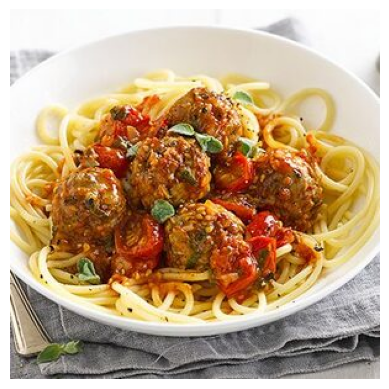

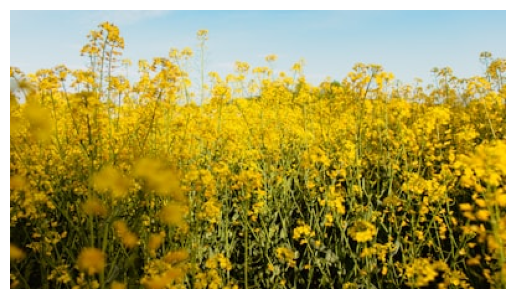

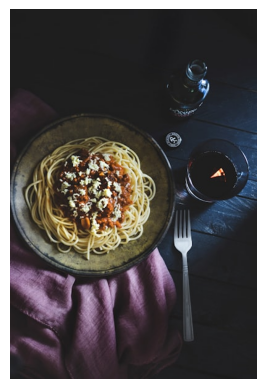

In [4]:
import google.generativeai as genai
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os
import requests

# Configuración de la API
GOOGLE_CREDENTIALS = os.getenv('GOOGLE_CREDENTIALS_PATH')
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = GOOGLE_CREDENTIALS

UNSPLASH_ACCESS_KEY = os.getenv('UNSPLASH_ACCESS_KEY')
EDAMAM_APP_ID = os.getenv('EDAMAM_APP_ID')
EDAMAM_APP_KEY = os.getenv('EDAMAM_APP_KEY')

def obtener_nombre_receta_usuario():
    return input("Ingresa el nombre de la receta que te gustaría buscar: ")

def generar_prompt():
    contexto = (
        "Estoy creando una aplicación que proporciona recetas de cocina detalladas y visuales. "
        "Proporciona la receta completa para preparar [nombre del plato] incluyendo una lista detallada de ingredientes y un paso a paso claro."
    )
    try:
        response = genai.generate_text(prompt=contexto, temperature=0.7, max_output_tokens=10)
        nombre_receta = response['candidates'][0]['output'].strip()
        return nombre_receta
    except Exception as e:
        print(f"Error en la generación del prompt: {e}")
        return None

def obtener_receta(nombre_receta):
    url = f"https://api.edamam.com/search?q={nombre_receta}&app_id={EDAMAM_APP_ID}&app_key={EDAMAM_APP_KEY}&lang=es"
    response = requests.get(url)
    if response.status_code == 200:
        datos = response.json()
        if datos['hits']:
            receta = datos['hits'][0]['recipe']
            ingredientes = [ingrediente['food'] for ingrediente in receta.get('ingredients', [])]
            instrucciones = receta.get('ingredientLines', [])
            return receta['label'], receta['image'], ingredientes, instrucciones
        else:
            print(f"No se encontró ninguna receta para '{nombre_receta}'")
            return None, None, None, None
    else:
        print(f"Error en la solicitud de la receta: {response.status_code}")
        print(response.text)
        return None, None, None, None

def obtener_imagenes(ingredientes):
    imagenes = []
    for ingrediente in ingredientes:
        url = f"https://api.unsplash.com/search/photos?query={ingrediente}&client_id={UNSPLASH_ACCESS_KEY}"
        response = requests.get(url)
        if response.status_code == 200:
            datos = response.json()
            if datos['results']:
                imagen_url = datos['results'][0]['urls']['small']
                imagenes.append(imagen_url)
            else:
                print(f"No se encontró ninguna imagen para el ingrediente '{ingrediente}'")
                imagenes.append(None)
        else:
            print(f"Error en la solicitud de la imagen para el ingrediente '{ingrediente}': {response.status_code}")
            print(response.text)
            imagenes.append(None)
    return imagenes

def mostrar_imagenes(imagenes):
    for img_url in imagenes:
        if img_url:
            response = requests.get(img_url)
            img = Image.open(BytesIO(response.content))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        else:
            print("Imagen no encontrada")

# Llama a las funciones
nombre_receta = obtener_nombre_receta_usuario()
if nombre_receta:
    print(f"Buscando receta para: {nombre_receta}")
    nombre, imagen_url, ingredientes, instrucciones = obtener_receta(nombre_receta)

    if nombre and ingredientes and instrucciones:
        print(f"Receta: {nombre}")
        print("Ingredientes:", ingredientes)
        print("Instrucciones:", instrucciones)
        if imagen_url:
            print(f"Imagen del plato: {imagen_url}")
            plt.imshow(Image.open(BytesIO(requests.get(imagen_url).content)))
            plt.axis('off')
            plt.show()
        imagenes = obtener_imagenes(ingredientes)
        mostrar_imagenes(imagenes)
    else:
        print("No se pudo obtener la receta solicitada")
else:
    print("No se proporcionó ningún nombre de receta")